In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools

In [19]:
t1_list = np.arange(0.2, 10, 0.2)
len_t1 = len(t1_list)
t2_list = np.arange(0.2, 15, 0.2)
len_t2 = len(t2_list)
dt = 0.1

# print(len_t1)
# print(len_t2)
print(t1_list)
print(t2_list)
rebound_2d = []
df_data = pd.DataFrame()


[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.  7.2
 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8]


In [20]:
for i in range(len_t1):
    rebound_list = []
    for j in range(len_t2):
        filename = 'virus_change_csv_2022/virus_changet1='+str(t1_list[i])+'_t2='+str(t2_list[j])+'.csv'
        if os.path.exists(filename) == True:
            listname = t2_list[j]
            csv_2d = []
            with open(filename) as f:
                reader = csv.reader(f)
                l = [row for row in reader]
            # print(l)

            vlist_2d = [row[1:] for row in l[1:]]
            vlist = list(itertools.chain.from_iterable(vlist_2d))
            # print(vlist[2])
            len_vlist = len(vlist)
            vmax = max(vlist)
            # print(max(vlist))
            # print(range_vlist)
            
            num_t2 = int(listname/dt + 1)
#             print(listname)
#             print (num_t2)

            v_t2 = vlist[num_t2:]
            t2_fl = [float(k) for k in v_t2]
            # print (after_peak)

            len_t2_fl = len(t2_fl)
            for k in range(len_t2_fl-1):
                sa = t2_fl[k+1] - t2_fl[k]
                if sa>0:
                    rebound = 2
                    break
                else:
                    rebound = 1
        else:
            rebound = 0
        rebound_list.append(rebound)
    rebound_2d.append(rebound_list)


In [21]:
df_data = pd.DataFrame(rebound_2d)

index_list = [round(i, 1) for i in t1_list]
columns_list = [round(i, 1) for i in t2_list]

df_data.index = index_list
df_data.columns = columns_list
df_data2 = df_data.T
df_data3 = df_data2.iloc[::-1]

# # print(df_data3)
# print(index_list)
# print(df_data3.index)
# print(df_data.index)

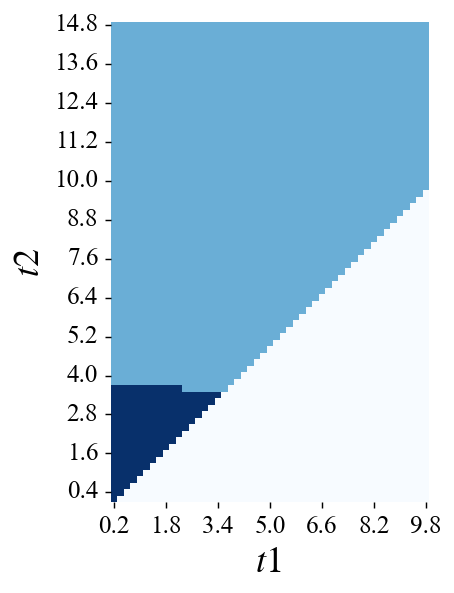

In [22]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'
fig, ax = plt.subplots(dpi=130)
sns.heatmap(df_data3, ax =ax, cbar=False, square=True, cmap='Blues', xticklabels =8, yticklabels =6)
plt.xlabel(r"$t1$ ",fontsize=20)
plt.ylabel(r"$t2$ ",fontsize=20)
plt.savefig('df_rebound.png')